In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({
    'men': [80.2, 80.8, 57.5, 98, 50.5, 73.8, 77.4, 59.7, 77.9, 52.6],
    'women': [57.9, 57.3, 72.8, 48.2, 59.5, 48.3, 61.2, 53.9, 53.9, 70.7]
})

In [3]:
df

,men,women
0,80.2,57.9
1,80.8,57.3
2,57.5,72.8
3,98.0,48.2
4,50.5,59.5
5,73.8,48.3
6,77.4,61.2
7,59.7,53.9
8,77.9,53.9
9,52.6,70.7


### MEAN, MEDIAN, MODE

In [5]:
df.men.mean() - df.women.mean()

12.469999999999999

In [6]:
np.median([2, 7, 4, 3, 6, 4, 1, 2])

3.5

In [10]:
df.median()

men      75.6
women    57.6
dtype: float64

In [40]:
sorted([2, 7, 4, 3, 6, 4, 1, 2])

[1, 2, 2, 3, 4, 4, 6, 7]

In [41]:
np.quantile([2, 7, 4, 3, 6, 4, 1, 2], q=0.75)

4.5

In [36]:
sorted([5, 2, 4, 8, 1, 6, 7])

[1, 2, 4, 5, 6, 7, 8]

In [31]:
pd.concat([df.men, df.women]).median()

59.6

In [28]:
df

,men,women
0,80.2,57.9
1,80.8,57.3
2,57.5,72.8
3,98.0,48.2
4,50.5,59.5
5,73.8,48.3
6,77.4,61.2
7,59.7,53.9
8,77.9,53.9
9,52.6,70.7


In [32]:
df.melt(var_name='Sex', value_name='Weight')

,Sex,Weight
0,men,80.2
1,men,80.8
2,men,57.5
3,men,98.0
4,men,50.5
5,men,73.8
6,men,77.4
7,men,59.7
8,men,77.9
9,men,52.6


In [30]:
df.melt(var_name='Sex', value_name='Weight').Weight.median()

59.6

In [34]:
# or
pd.concat([df.men, df.women]).median()

59.6

In [59]:
print(f"{df.men.quantile(q=0.25, interpolation='midpoint')}")
print(f"{df.men.quantile(q=0.75, interpolation='midpoint')}")
print(f"{df.women.quantile(q=0.25, interpolation='midpoint')}")
print(f"{df.women.quantile(q=0.75, interpolation='midpoint')}")

58.6
79.05000000000001
53.9
60.35


In [54]:
df.describe()

,men,women
count,10.000000,10.000000
mean,70.840000,58.370000
std,15.182534,8.271108
min,50.500000,48.200000
25%,58.050000,53.900000
50%,75.600000,57.600000
75%,79.625000,60.775000
max,98.000000,72.800000


In [61]:
df.quantile(q=[0.25, 0.75], axis=0, numeric_only=True, interpolation='midpoint')

,men,women
0.25,58.60,53.90
0.75,79.05,60.35


In [68]:
iqr_men = 79.05 - 58.60
iqr_men

20.449999999999996

In [64]:
range_men = df.men.max() - df.men.min()
range_women = df.women.max() - df.women.min()
print(range_men, range_women)

47.5 24.599999999999994


In [67]:
iqr_women = 60.35 - 53.90
iqr_women

6.450000000000003

In [66]:
df.var()

men      230.509333
women     68.411222
dtype: float64

In [73]:
df.men[df.men < (df.men.quantile(q=0.25, interpolation='midpoint') - 1.5 * iqr_men)]

Series([], Name: men, dtype: float64)

In [74]:
df.men[df.men > (df.men.quantile(q=0.75, interpolation='midpoint') + 1.5 * iqr_men)]

Series([], Name: men, dtype: float64)

In [72]:
df.women[df.women < (df.women.quantile(q=0.25, interpolation='midpoint') - 1.5 * iqr_women)]

Series([], Name: women, dtype: float64)

In [75]:
df.women[df.women > (df.women.quantile(q=0.75, interpolation='midpoint') + 1.5 * iqr_women)]

2    72.8
9    70.7
Name: women, dtype: float64

In [124]:
df = pd.DataFrame({
    'year': [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
    'temp': [-4.7, -6.1, -5.5, -3.3, -7.1, -3.1, -5.2, -7.3, -12.1, -6.6, -5.9, -6.3]
})

In [125]:
df

,year,temp
0,2007,-4.7
1,2008,-6.1
2,2009,-5.5
3,2010,-3.3
4,2011,-7.1
5,2012,-3.1
6,2013,-5.2
7,2014,-7.3
8,2015,-12.1
9,2016,-6.6


<AxesSubplot:>

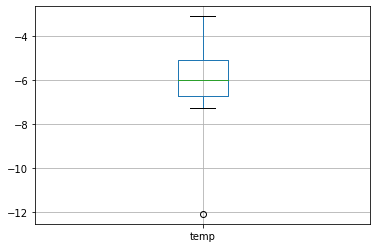

In [126]:
df.boxplot(column=['temp'])

In [92]:
iqr = df.temp.quantile(q=0.75, interpolation='midpoint') - df.temp.quantile(q=0.25, interpolation='midpoint')
quant_25 = df.temp.quantile(q=0.25, interpolation='midpoint')
quant_75 = df.temp.quantile(q=0.75, interpolation='midpoint')
[df.temp[df.temp < quant_25 - 1.5 * iqr], df[df.temp > quant_75 + 1.5 * iqr]]

[8   -12.1
 Name: temp, dtype: float64,
 Empty DataFrame
 Columns: [year, temp]
 Index: []]

In [112]:
df[df.temp < quant_25 - 1.5 * iqr]

,year,temp
8,2015,-12.1


In [111]:
print(f"""
mean is equal to {df.temp.mean() :.1f},
median is equal to {df.temp.median() :.1f},
std is equal to {df.temp.std() :.1f},
range is equal to {df.temp.max() - df.temp.min() :.1f},
iqr is equal to {iqr :.1f},
whether it has outliers - yes, and if yes, in which year: {int(df[df.temp < quant_25 - 1.5 * iqr].year)}, 
""")


mean is equal to -6.1,
median is equal to -6.0,
std is equal to 2.3,
range is equal to 9.0,
iqr is equal to 1.9,
whether it has outliers - yes, and if yes, in which year: 2015, 



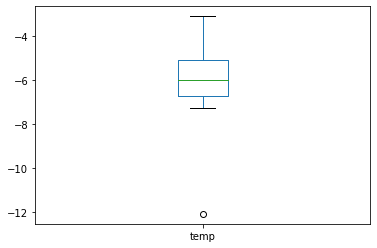

In [121]:
df.temp.plot(kind='box');

In [122]:
df = pd.DataFrame({
    'city_a': [240, 440, 455, 475, 475, 490, 490, 500, 500, 500, 530, 550, 578, 580, 620, 687, 694, 703, 859],
    'city_b': [500, 564, 590, 600, 600, 600, 645, 650, 660, 667, 689, 692, 700, 700, 705, 735, 760, 764, 805]
})

<AxesSubplot:>

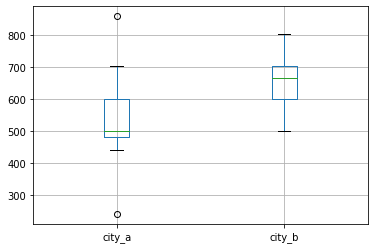

In [123]:
df.boxplot(column=['city_a', 'city_b'])

In [127]:
data = pd.DataFrame({
  'value': [48, 44, 42.5, 40.5, 40.5, 39, 39, 38, 38, 38, 35, 33, 30.2, 30, 26, 19.3, 27, 21]
})

<AxesSubplot:>

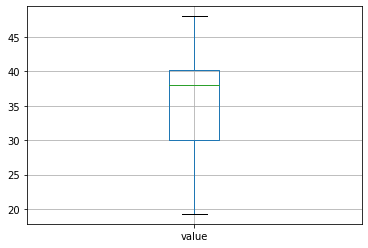

In [128]:
data.boxplot()

In [129]:
data.median(axis=0)

value    38.0
dtype: float64

In [130]:
df = pd.DataFrame({
    'group_a': [72, 66, 63.75, 60.75, 60.75, 58.5, 58.5, 57, 57, 57, 52.5, 49.5, 45.3, 45, 39, 28.95, 40.5, 31.5, 49],
    'group_b': [71, 72, 60, 50, 57, 77, 81, 58, 62, 61, 73, 74, 76, 65, 66, 67, 67, 67, 69]
})

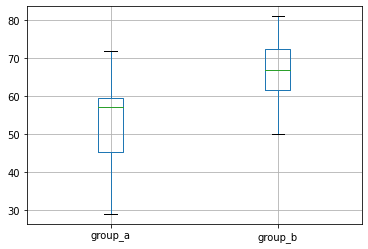

In [132]:
df.boxplot();